# EDA

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
pd.set_option("display.max_columns", None)

## Games data

In [206]:
all_games = pd.read_csv("data/games_with_features.csv", index_col="id")

In [207]:
all_games.head()

,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,home_team.conference,home_team.division,home_team.full_name,visitor_team.id,visitor_team.abbreviation,visitor_team.conference,visitor_team.division,visitor_team.full_name,winner,home_team_avg_score_historical,visitor_team_avg_score_historical,home_team_id_year,visitor_team_id_year,home_team_avg_score,visitor_team_avg_score,home_avg_score_diff,visitor_avg_score_diff
id,,,,,,,,,,,,,,,,,,,,,,,,,,
47179,2019-01-30,126,4,False,2018,Final,94,2,BOS,East,Atlantic,Boston Celtics,4,CHA,East,Southeast,Charlotte Hornets,1,105.8,98.2,2 2018,4 2018,112.8,108.3,3.620000,-3.831707
48751,2019-02-09,112,4,False,2018,Final,123,2,BOS,East,Atlantic,Boston Celtics,13,LAC,West,Pacific,LA Clippers,0,105.8,100.7,2 2018,13 2018,112.8,113.1,3.620000,0.581818
48739,2019-02-08,117,4,False,2018,Final,110,23,PHI,East,Atlantic,Philadelphia 76ers,8,DEN,West,Northwest,Denver Nuggets,1,103.3,104.2,23 2018,8 2018,117.9,108.2,8.725532,-4.670213
48740,2019-02-08,119,4,False,2018,Final,106,30,WAS,East,Southeast,Washington Wizards,6,CLE,East,Central,Cleveland Cavaliers,1,103.4,98.3,30 2018,6 2018,116.4,103.8,7.429268,-8.419512
48746,2019-02-08,102,4,False,2018,Final,96,26,SAC,West,Pacific,Sacramento Kings,16,MIA,East,Southeast,Miami Heat,1,105.5,96.0,26 2018,16 2018,114.9,105.4,5.129268,-6.670732


#### Using Data from 1979 to 2020

In [208]:
all_seasons = np.sort(all_games["season"].unique())
all_seasons

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

#### Historically, The home team wins 61% of the time

In [209]:
n_home_wins = all_games[all_games["home_team_score"].gt(all_games["visitor_team_score"])].shape[0]  # number of games where home team won
n_games = all_games.shape[0]  # number of games
home_win_pct = round(n_home_wins/n_games, 2)

print(n_home_wins, n_games, home_win_pct, sep="\n")

30447
49834
0.61


In [210]:
home_win_pcts = []
for season in all_seasons:
    season_games = all_games[all_games["season"].eq(season)]
    n_home_wins = season_games[season_games["home_team_score"].gt(season_games["visitor_team_score"])].shape[0]  # number of games where home team won
    n_games = season_games.shape[0]  # number of games
    home_win_pct = round(n_home_wins/n_games, 2)
    home_win_pcts.append(home_win_pct)
    print(season, n_home_wins, n_games, home_win_pct)

1979 622 950 0.65
1980 612 995 0.62
1981 592 989 0.6
1982 612 986 0.62
1983 687 1022 0.67
1984 642 1011 0.64
1985 662 1010 0.66
1986 677 1014 0.67
1987 697 1023 0.68
1988 729 1087 0.67
1989 767 1179 0.65
1990 773 1175 0.66
1991 751 1180 0.64
1992 725 1183 0.61
1993 729 1184 0.62
1994 700 1178 0.59
1995 764 1257 0.61
1996 733 1261 0.58
1997 746 1252 0.6
1998 492 791 0.62
1999 775 1264 0.61
2000 752 1260 0.6
2001 744 1260 0.59
2002 800 1277 0.63
2003 789 1271 0.62
2004 791 1314 0.6
2005 802 1319 0.61
2006 778 1309 0.59
2007 803 1316 0.61
2008 805 1315 0.61
2009 786 1312 0.6
2010 797 1311 0.61
2011 637 1074 0.59
2012 806 1314 0.61
2013 764 1319 0.58
2014 755 1311 0.58
2015 782 1316 0.59
2016 763 1309 0.58
2017 770 1312 0.59
2018 774 1311 0.59
2019 623 1142 0.55
2020 639 1171 0.55


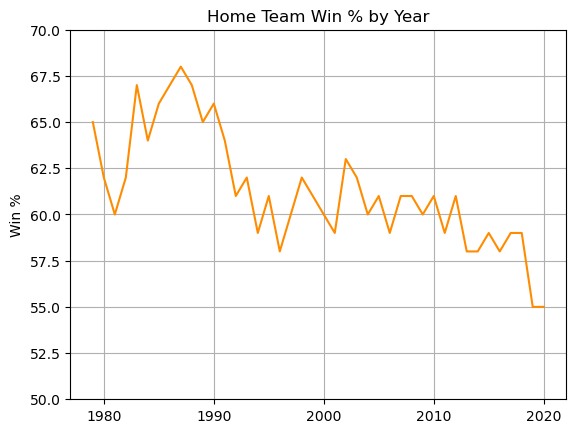

In [288]:
plt.figure()
plt.plot(all_seasons, home_win_pcts, c="darkorange")
plt.title("Home Team Win % by Year")
plt.grid()
plt.ylabel("Win %")
plt.ylim(.5, .7)
plt.yticks(ticks=plt.yticks()[0], labels=(plt.yticks()[0]*100).round(1))
plt.show()

#### Naturally it follows that teams score more points when they are playing at home

In [212]:
home_avg = all_games[["home_team.full_name", "season", "home_team_avg_score"]].groupby(["home_team.full_name", "season"]).mean().values

In [213]:
visiting_avg = all_games[["visitor_team.full_name", "season", "visitor_team_avg_score"]].groupby(["visitor_team.full_name", "season"]).mean().values

In [214]:
avg_score_by_team = all_games[["home_team.full_name", "season", "home_team_avg_score"]].groupby(["home_team.full_name", "season"]).mean()

avg_score_by_team.columns = ["avg_score_as_home"]

avg_score_by_team["avg_score_as_home"] = home_avg
avg_score_by_team["avg_score_as_visitor"] = visiting_avg
avg_score_by_team["avg_score_mean"] = (home_avg + visiting_avg) / 2
avg_score_by_team["avg_score_diff"] = (home_avg - visiting_avg)
avg_score_by_team.reset_index(inplace=True)

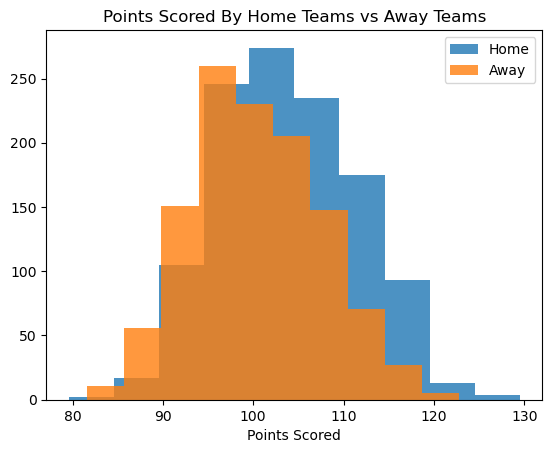

In [293]:
plt.figure()
plt.hist(avg_score_by_team["avg_score_as_home"], alpha=0.8, label="Home", bins=10)
plt.hist(avg_score_by_team["avg_score_as_visitor"], alpha=0.8, label="Away", bins=10)
plt.title("Points Scored By Home Teams vs Away Teams")
plt.xlabel("Points Scored")
plt.legend()
plt.show()

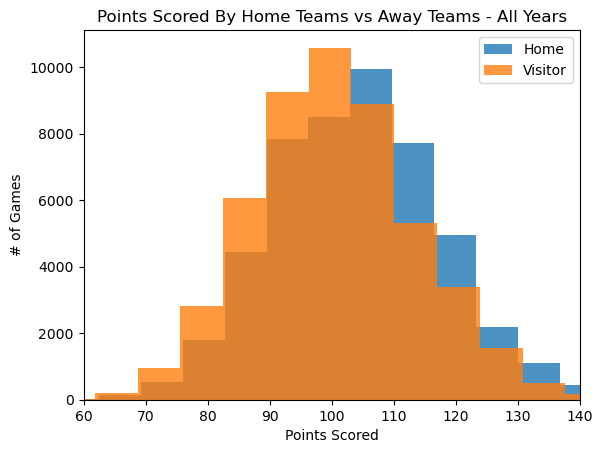

In [303]:
plt.figure()
plt.hist(all_games["home_team_score"], alpha=0.8, label="Home", bins=20)
plt.hist(all_games["visitor_team_score"], alpha=0.8, label="Visitor", bins=20)
plt.xlim(60,140)
plt.title("Points Scored By Home Teams vs Away Teams - All Years")
plt.xlabel("Points Scored")
plt.ylabel("# of Games")
plt.legend()
plt.show()

In [225]:
avg_score_by_team[avg_score_by_team["avg_score_as_home"].gt(120)]

,home_team.full_name,season,avg_score_as_home,avg_score_as_visitor,avg_score_mean,avg_score_diff
247,Dallas Mavericks,1986,120.7,112.6,116.65,8.1
283,Denver Nuggets,1980,124.7,118.9,121.80,5.8
284,Denver Nuggets,1981,129.5,122.8,126.15,6.7
285,Denver Nuggets,1982,125.5,119.9,122.70,5.6
286,Denver Nuggets,1983,126.7,120.6,123.65,6.1
287,Denver Nuggets,1984,122.8,117.8,120.30,5.0
289,Denver Nuggets,1986,122.1,110.8,116.45,11.3
291,Denver Nuggets,1988,122.5,113.2,117.85,9.3
293,Denver Nuggets,1990,120.1,119.6,119.85,0.5
376,Golden State Warriors,1989,121.4,111.2,116.30,10.2


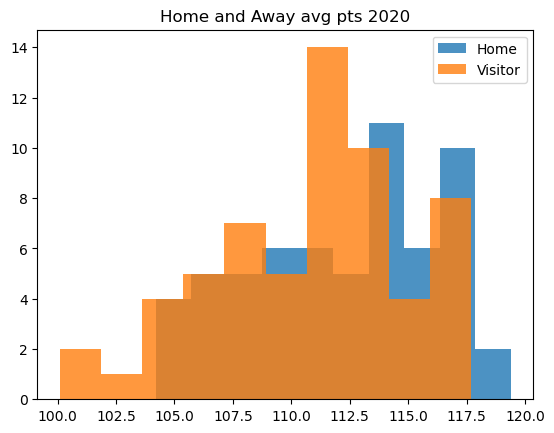

In [223]:
plt.figure()
plt.hist(avg_score_by_team[avg_score_by_team["season"].isin([2019,2020])]["avg_score_as_home"], alpha=0.8, label="Home")
plt.hist(avg_score_by_team[avg_score_by_team["season"].isin([2019,2020])]["avg_score_as_visitor"], alpha=0.8, label="Aw")
plt.title("Home and Away avg pts 2020")
plt.legend()
plt.show()

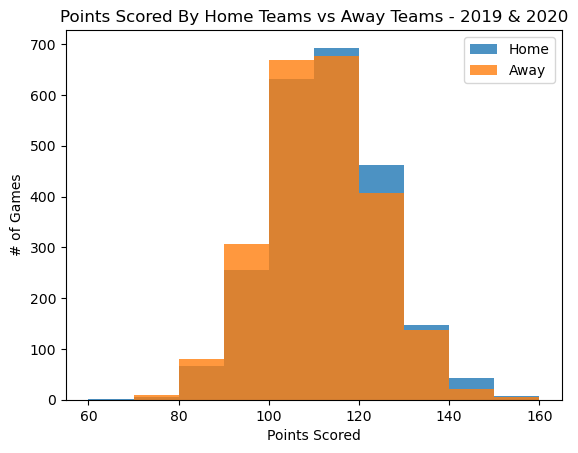

In [321]:
plt.figure()
plt.hist(all_games[all_games["season"].isin([2019,2020])]["home_team_score"], alpha=0.8, label="Home", 
         bins=[60,70,80,90,100,110,120,130,140,150,160])
plt.hist(all_games[all_games["season"].isin([2019,2020])]["visitor_team_score"], alpha=0.8, label="Away",
        bins=[60,70,80,90,100,110,120,130,140,150,160])
plt.title("Points Scored By Home Teams vs Away Teams - 2019 & 2020")
plt.xlabel("Points Scored")
plt.ylabel("# of Games")
plt.legend()
plt.show()

In [217]:
avg_score_by_team["avg_score_diff"].mean()

3.451546391752577

In [218]:
print(all_games["home_team_avg_score"].gt(all_games["visitor_team_avg_score"]).value_counts())
print(round(43173 / 50460, 2))

True     35411
False    14423
dtype: int64
0.86


In [219]:
avg_score_by_season = all_games[["season", "home_team_avg_score", "visitor_team_avg_score"]].groupby("season").mean()
avg_score_by_season["mean_avg_score"] = (avg_score_by_season["home_team_avg_score"] + avg_score_by_season["visitor_team_avg_score"]) / 2
avg_score_by_season["diff"] = avg_score_by_season["home_team_avg_score"] - avg_score_by_season["visitor_team_avg_score"]

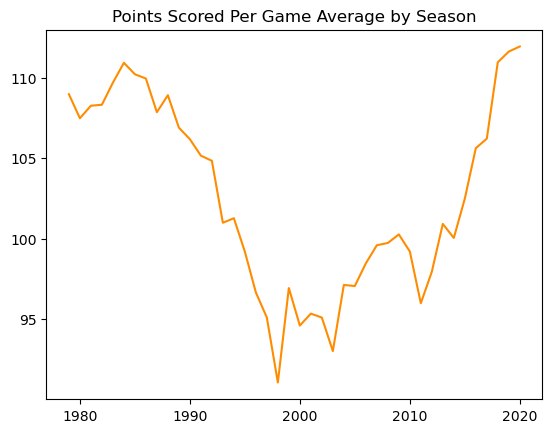

In [324]:
plt.figure()
plt.title("Points Scored Per Game Average by Season")
plt.plot(avg_score_by_season.index, avg_score_by_season["mean_avg_score"], color="darkorange")
plt.show()

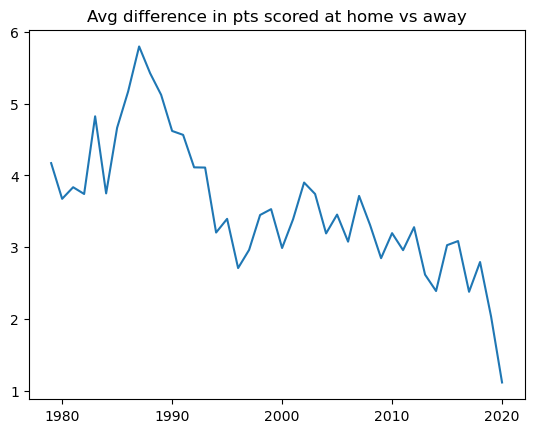

In [221]:
plt.figure()
plt.plot(avg_score_by_season.index, avg_score_by_season["diff"])
plt.title("Avg difference in pts scored at home vs away")
plt.show()

In [241]:
denver_home = all_games[all_games["home_team.full_name"].eq("Denver Nuggets")]
denver_away = all_games[all_games["visitor_team.full_name"].eq("Denver Nuggets")]
denver = pd.concat([denver_home, denver_away])

In [258]:
denver_home_win_pct = denver_home[["season", "winner"]].groupby("season").sum() / denver_home[["season", "winner"]].groupby("season").count()

In [262]:
denver_away_win_pct = 1 - denver_away[["season", "winner"]].groupby("season").sum() / denver_away[["season", "winner"]].groupby("season").count()

<Figure size 640x480 with 0 Axes>

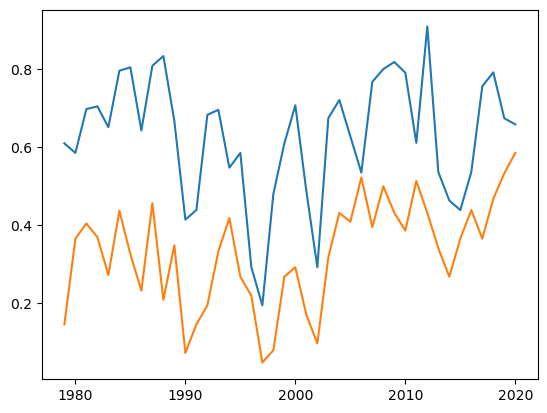

In [274]:
plt.figure()
plt.plot(denver_home_win_pct)
plt.plot(denver_away_win_pct)
plt.show()

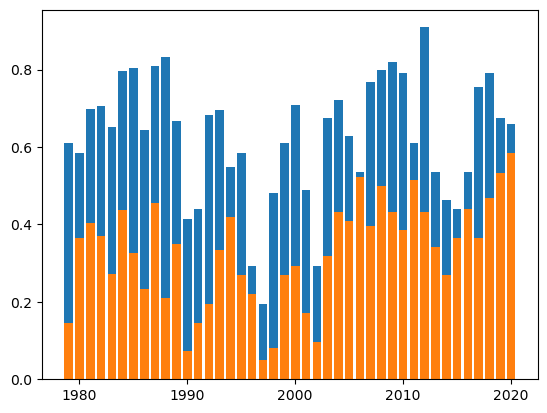

In [279]:
plt.figure()
plt.bar(denver_home_win_pct.index, denver_home_win_pct.winner)
plt.bar(denver_home_win_pct.index, denver_away_win_pct.winner)
plt.show()

In [250]:
denver_home["winner"].value_counts(normalize=True)

1    0.633803
0    0.366197
Name: winner, dtype: float64

In [251]:
denver_away["winner"].value_counts(normalize=True)

1    0.664049
0    0.335951
Name: winner, dtype: float64

In [281]:
not_denver_home = all_games[all_games["home_team.full_name"].ne("Denver Nuggets")]
not_denver_away = all_games[all_games["visitor_team.full_name"].ne("Denver Nuggets")]
not_denver = pd.concat([denver_home, denver_away])

In [282]:
not_denver_home_win_pct = not_denver_home[["season", "winner"]].groupby("season").sum() / not_denver_home[["season", "winner"]].groupby("season").count()

In [283]:
not_denver_away_win_pct = 1 - not_denver_away[["season", "winner"]].groupby("season").sum() / not_denver_away[["season", "winner"]].groupby("season").count()

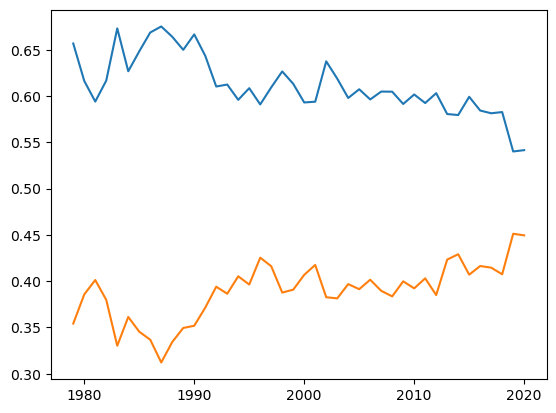

In [284]:
plt.figure()
plt.plot(not_denver_home_win_pct)
plt.plot(not_denver_away_win_pct)
plt.show()

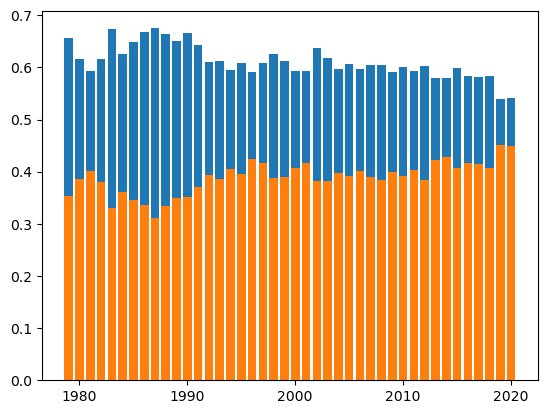

In [285]:
plt.figure()
plt.bar(not_denver_home_win_pct.index, not_denver_home_win_pct.winner)
plt.bar(not_denver_home_win_pct.index, not_denver_away_win_pct.winner)
plt.show()

In [ ]:
all_home[["season", "winner"]].groupby("season").sum() / all_home[["season", "winner"]].groupby("season").count()

In [222]:
avg_score_by_season

,home_team_avg_score,visitor_team_avg_score,mean_avg_score,diff
season,,,,
1979,111.059579,106.888316,108.973947,4.171263
1980,109.318291,105.643819,107.481055,3.674472
1981,110.175834,106.339939,108.257887,3.835895
1982,110.189452,106.447566,108.318509,3.741886
1983,112.098924,107.276712,109.687818,4.822211
1984,112.798912,109.048764,110.923838,3.750148
1985,112.545842,107.882277,110.214059,4.663564
1986,112.531558,107.364103,109.947830,5.167456
1987,110.752493,104.958553,107.855523,5.793939
